In [15]:
import nltk
# nltk.download()
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string  
import matplotlib.pyplot as plt 
import matplotlib.style as style

In [16]:
style.use('ggplot')

pun = string.punctuation 
stopwords = stopwords.words("english")
stopwords += list(pun)  # Creating a list of words and punctuations that have less relevance
print(stopwords)
lemmatizer = WordNetLemmatizer() 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
def freq(text,stopwords) :    # Returns the frequency of words in a text 
  word_tokens = word_tokenize(text)
  tokens = []
  for word in word_tokens :
    if word.lower() not in stopwords :
      tokens.append(word) 
    
  for word in tokens :    #Lemmatising for better results
    lemmatizer.lemmatize(word)
    
  types = []     #Finding types, ie, unique tokens
  for word in tokens :
        if word not in types :
            types.append(word)
  counts = [0]*len(types)
  for word in tokens :
    counts[types.index(word)] += 1
    
  temp = []
  for i in range(len(types)) :
    t = (types[i],counts[i])
    temp.append(t)
  temp.sort(key = lambda x: x[1])
  temp = temp[::-1]
  for i in range(len(temp)) :
    types[i] = temp[i][0]
    counts[i] = temp[i][1]
  freq = dict(zip(types,counts))
  return freq

In [18]:
def plotgraph(text,stopwords) :
  word_tokens = word_tokenize(text)
  tokens = []
  for word in word_tokens :
    if word.lower() not in stopwords :
      tokens.append(word) 
    
  for word in tokens :
    lemmatizer.lemmatize(word)
  count = 0
  y = []

  types = [] 

  for token in tokens : 
    if token not in types :
      types.append(token)
      count+= 1
    y.append(count)

  x = [i for i in range(len(tokens))]
  plt.plot(x,y) 
  plt.axis('square')
  plt.show()

In [19]:
f = open("Sample Texts/alice_correct.txt",'r')
text = f.read()
f.close()

In [28]:
def TTR(text,stopwords) :
  word_tokens = word_tokenize(text)
  word_tokens = [x.lower() for x in word_tokens] 
  tokens = []
  for word in word_tokens :
    if word not in stopwords :
      tokens.append(word_tokens)
  types = []
  for word in tokens : 
    if word not in types :
      types.append(word)  
  ttr = len(types)/len(tokens)
  return ttr

In [21]:
freq = freq(text,stopwords)
print(freq)

{'said': 456, 'Alice': 395, '--': 264, "n't": 207, "'s": 186, 'little': 125, 'one': 94, 'know': 87, 'like': 84, 'went': 83, 'would': 82, 'could': 82, 'Queen': 74, 'thought': 74, 'see': 66, 'time': 65, "''": 64, 'King': 61, 'Turtle': 58, 'began': 58, 'Mock': 56, 'Gryphon': 55, 'Hatter': 55, 'quite': 53, 'way': 53, 'say': 51, 'much': 51, 'head': 50, 'think': 50, 'thing': 49, '``': 49, "'ll": 49, "'m": 48, 'voice': 47, 'go': 47, 'got': 45, 'looked': 45, 'first': 44, 'Rabbit': 44, 'get': 44, 'Duchess': 42, 'round': 41, 'must': 41, 'never': 41, 'Dormouse': 40, 'tone': 40, 'came': 40, "'ve": 39, 'great': 39, 'back': 37, 'well': 37, "'re": 36, 'Oh': 35, 'March': 34, 'large': 33, 'last': 32, 'Hare': 31, 'two': 31, 'long': 31, 'put': 31, 'moment': 31, 'looking': 30, 'Mouse': 30, 'heard': 30, 'door': 30, 'things': 30, 'found': 30, 'made': 30, 'nothing': 30, 'replied': 29, 'right': 29, 'might': 28, 'next': 28, 'dear': 28, 'eyes': 28, 'tell': 27, 'make': 27, 'going': 27, 'look': 27, 'seemed': 27, 

In [29]:
ttr = TTR(text,stopwords)
print(ttr)

7.567158531971244e-05


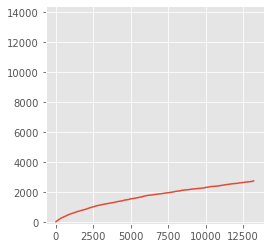

In [23]:
plotgraph(text,stopwords)